In [1]:
import pandas as pd
crime = pd.read_csv("CrimeRates.csv")
Counts = pd.read_csv("Counts.csv")
policemapfinal = pd.read_csv("police_map.csv")
import matplotlib.pyplot as plt
#import crime rates and import newly made dataset of the number of times each neighborhood was reported

In [2]:
crime.head(10)

,INCIDENTNEIGHBORHOOD,OFFENSES
0,South Side Flats,3503 Criminal Trespass
1,Point Breeze North,3934 Theft from Vehicle
2,Crafton Heights,3921(a) Theft by Unlawful Taking or Dispositio...
3,Homewood North,3304(a)(5) CRIMINAL MISCHIEF - Intentionally D...
4,Perry North,2709(a)(4) Harassment Communicates Prohibited ...
5,Middle Hill,9496 Dead on Arrival (DOA)
6,Troy Hill,9489 Found Property
7,Squirrel Hill South,9992 Governor's Order Violation
8,Mount Oliver,2709(a) Harassment.
9,Homewood South,2709(a) Harassment.


In [3]:
for col_name in crime:
    print(col_name)

INCIDENTNEIGHBORHOOD
OFFENSES


In [4]:
counts = crime['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=True)
crime['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=True).head()
#get counts for each neighborhood's number of reported crimes to put into its own separate dataset

Allegheny West    1
Outside County    1
Outside State     2
Regent Square     2
New Homestead     2
Name: INCIDENTNEIGHBORHOOD, dtype: int64

In [6]:
Counts.head(5)

,Neighborhood,Number of Crimes
0,Mt. Oliver,0
1,Central Northside,0
2,Bloomfield,0
3,Allegheny West,1
4,Outside County,1


In [7]:
import geopandas

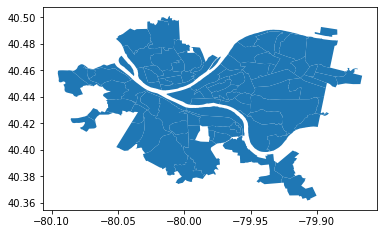

In [8]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()
#import neighborhood map data

In [9]:
neighborhoods[['hood','area','perimeter','geometry']].head()

,hood,area,perimeter,geometry
0,Central Oakland,7843108.0,11526.863,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,13904629.0,20941.387,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,5999801.5,18271.426,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,7202139.0,15696.759,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,16947852.0,23903.078,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


In [10]:
police_map = neighborhoods.merge(Counts, how='left', left_on='hood', right_on='Neighborhood')
police_map[['hood','Number of Crimes','geometry']].head() 
#merge crime data with map data

,hood,Number of Crimes,geometry
0,Central Oakland,23,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,32,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,9,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,21,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,14,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


/opt/tljh/user/lib/python3.6/site-packages/geopandas/plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


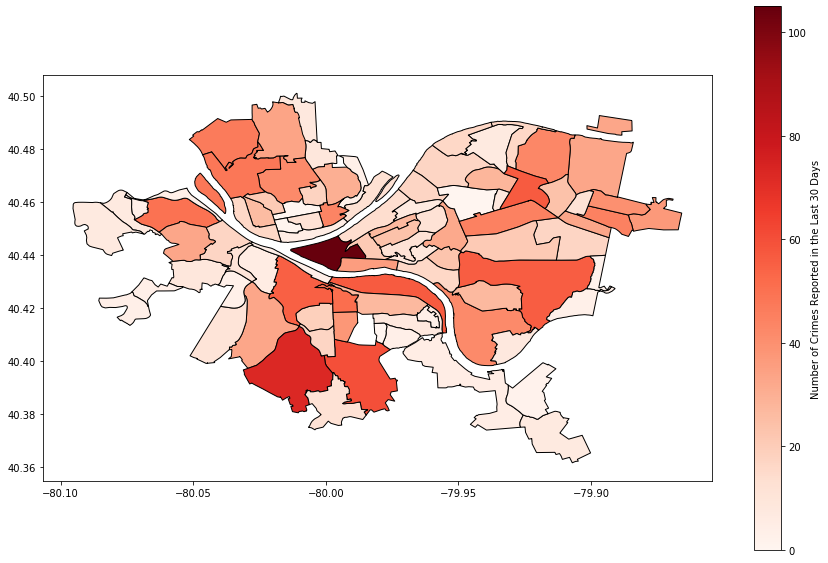

In [11]:
police_map.plot(column='Number of Crimes', 
               cmap='Reds',              
               edgecolor="black",       
               legend=True,              
               legend_kwds={'label': "Number of Crimes Reported in the Last 30 Days"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               ) #make a map of pitt neighborhoods by crime rate

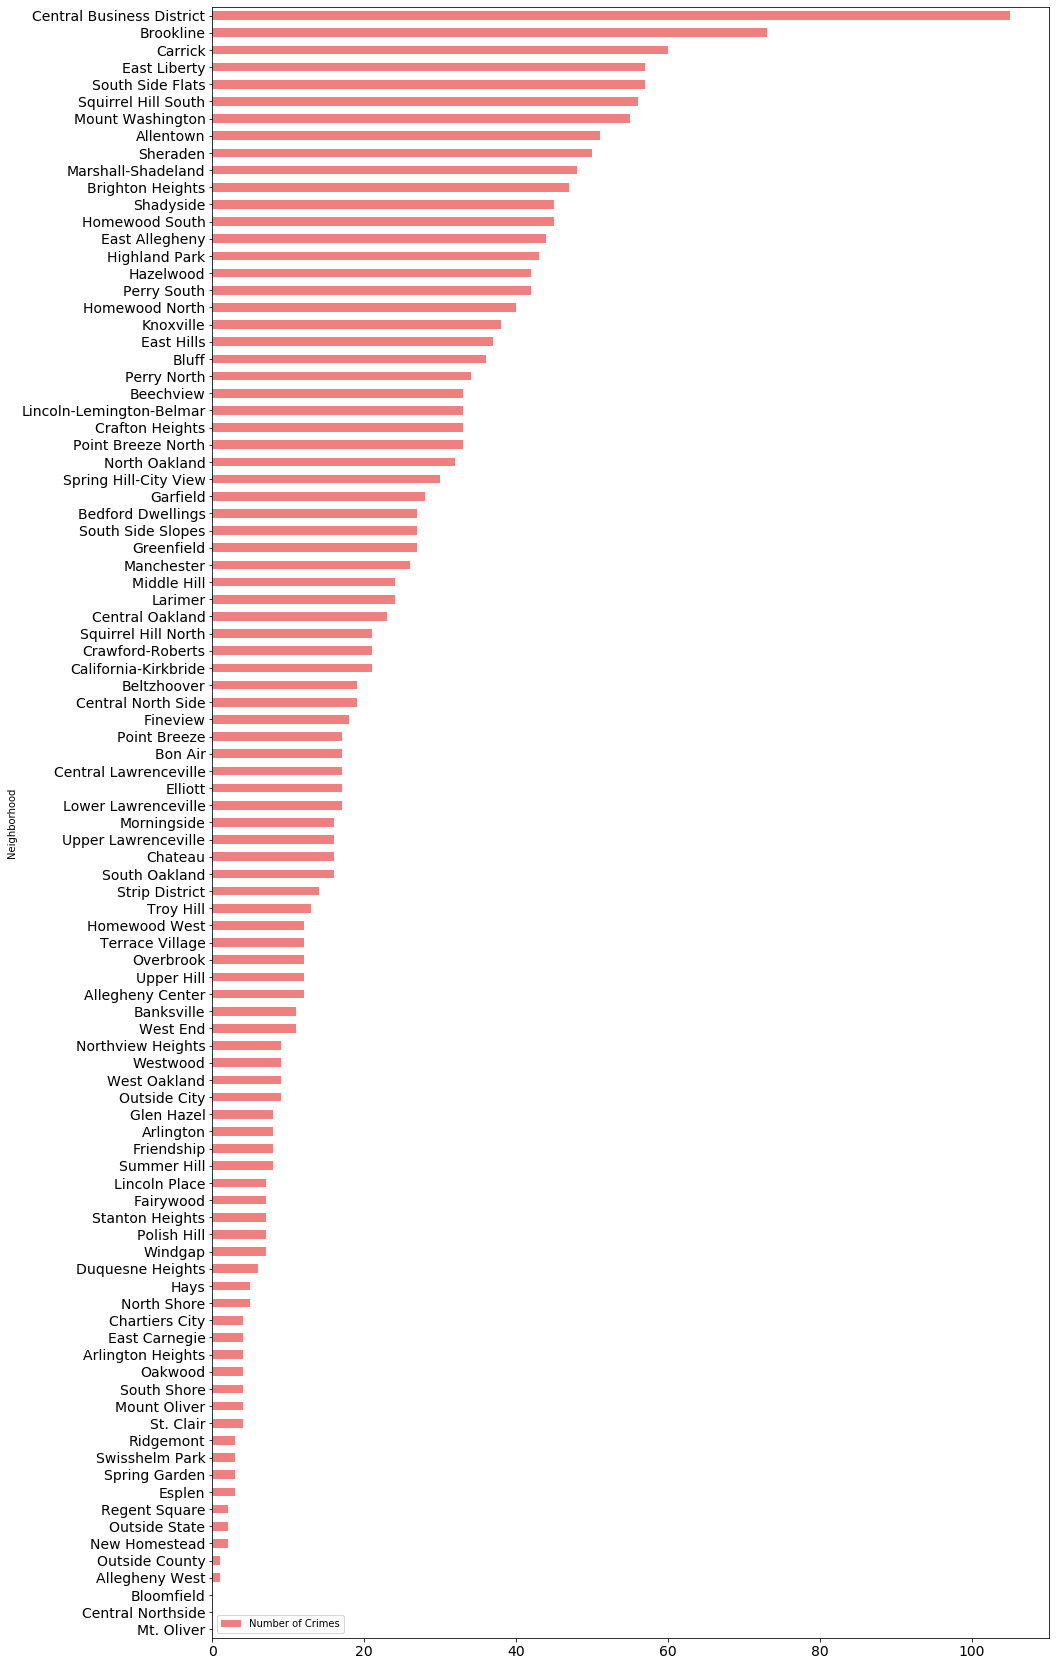

In [12]:
Counts.plot.barh(figsize=(15, 30), x='Neighborhood', y='Number of Crimes', color='lightcoral', fontsize=14)

In [13]:
pm=police_map[['hood', 'Number of Crimes']]
pm.to_csv('police_map.csv')

In [14]:
policemapfinal['Number of Crimes']=policemapfinal['Number of Crimes'].fillna(0)
policemapfinal[policemapfinal['Number of Crimes']<3].head(10)
#analyzing which neighborhoods had the least crime reports

,Unnamed: 0,hood,Number of Crimes
25,25,Central Northside,0
31,31,Bloomfield,0
51,51,Mt. Oliver,0
54,54,Allegheny West,1
67,67,Regent Square,2
79,79,New Homestead,2
